<div style="border:solid purple 3px; padding: 10px">
Introduction

The objective of this project is:
- Analyze the used car sales data in US
- Use streamlit to create a dashboard that the user can select options to view the output based on the user selections

In [ ]:
# importing the libraries
import pandas as pd
import numpy as nb
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
# Accessing the data
try:
    pd.read_csv('/Car-Sales-Data-Analysis/vehicles_us.csv')
except:
    data = pd.read_csv('vehicles_us.csv')

data.head(1)


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [ ]:
data.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


<div style="border:solid purple 3px; padding: 10px">

Observations:
- the dataset contains 51525 rows. However there is data missing in few of the columns 
- there are columns that have missing data
- There seem to be some outliers in the data for columns like odometer ( max  value = 990000)
- The oldest model car listed is from the year 1908
- The latest model car listed is from the year 2019

## Exploring the data

In [ ]:
# get the count of columns that have missing data
data.isna().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [ ]:
# det the sum of duplicated rows in the data
data.duplicated().sum()

0

#### List of unique values in the some columns from the dataset

In [ ]:
data['model_year'].unique()

array([2011.,   nan, 2013., 2003., 2017., 2014., 2015., 2012., 2008.,
       2018., 2009., 2010., 2007., 2004., 2005., 2001., 2006., 1966.,
       1994., 2019., 2000., 2016., 1993., 1999., 1997., 2002., 1981.,
       1995., 1996., 1975., 1998., 1985., 1977., 1987., 1974., 1990.,
       1992., 1991., 1972., 1967., 1988., 1969., 1989., 1978., 1965.,
       1979., 1968., 1986., 1980., 1964., 1963., 1984., 1982., 1973.,
       1970., 1955., 1971., 1976., 1983., 1954., 1962., 1948., 1960.,
       1908., 1961., 1936., 1949., 1958., 1929.])

In [ ]:
data['condition'].unique()

array(['good', 'like new', 'fair', 'excellent', 'salvage', 'new'],
      dtype=object)

In [ ]:
data['cylinders'].unique()

array([ 6.,  4.,  8., nan,  5., 10.,  3., 12.])

In [ ]:
model_counts = data['model'].unique()
model_counts

array(['bmw x5', 'hyundai sonata', 'chrysler 200', 'chrysler 300',
       'toyota camry', 'honda pilot', 'kia sorento',
       'chevrolet silverado 1500', 'honda accord', 'ram 1500',
       'gmc yukon', 'jeep cherokee', 'chevrolet traverse',
       'hyundai elantra', 'toyota rav4', 'chevrolet silverado',
       'ford fusion se', 'chevrolet impala', 'chevrolet corvette',
       'jeep liberty', 'toyota camry le', 'nissan altima',
       'subaru outback', 'toyota highlander', 'dodge charger',
       'ford f-150', 'chevrolet equinox', 'honda cr-v',
       'jeep grand cherokee', 'toyota 4runner', 'ford focus',
       'honda civic', 'kia soul', 'chevrolet colorado',
       'ford f150 supercrew cab xlt', 'chevrolet camaro lt coupe 2d',
       'chevrolet cruze', 'nissan frontier crew cab sv',
       'jeep grand cherokee laredo', 'nissan versa', 'ford f-250 sd',
       'chevrolet silverado 1500 crew', 'ford f250 super duty',
       'chevrolet camaro', 'ford mustang gt coupe 2d', 'subaru foreste

<div style="border:solid purple 3px; padding: 10px">

Observation:
- the 'model' series has the car manufacturer name and the car model date. It will be helpful to extract the car manufacturer name from this column using the split function.

In [ ]:
# extract car company name from the model information
data['car_company'] = data['model'].str.split(' ').str[0]
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,car_company
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19,bmw
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,hyundai
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,chrysler
5,14990,2014,chrysler 300,excellent,6,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15,chrysler
6,12990,2015,toyota camry,excellent,4,gas,79212.0,automatic,sedan,white,0.0,2018-12-27,73,toyota


In [ ]:
# counts by car company names
car_company_counts= data['car_company'].value_counts()
car_company_counts

ford          8943
chevrolet     7549
toyota        3862
honda         2498
ram           2327
jeep          2306
nissan        2244
gmc           1686
subaru         900
dodge          895
hyundai        830
volkswagen     622
chrysler       575
kia            397
cadillac       222
buick          198
bmw            197
acura          168
Name: car_company, dtype: int64

In [ ]:
#gettinhg the count of cars based on paint color. helps to fing out the most famous color.
color_distribution = data['paint_color'].value_counts()
color_distribution

white      7140
unknown    6503
black      5432
silver     4408
grey       3563
red        3179
blue       3152
green       950
brown       852
custom      825
yellow      182
orange      162
purple       71
Name: paint_color, dtype: int64

In [ ]:
data['is_4wd'].unique()

array([ 1., nan])

In [ ]:
# replacing the missing values 
data['is_4wd'] = data['is_4wd'].fillna(0)
data['paint_color'] = data['paint_color'].fillna('unknown')


In [ ]:
data['is_4wd'].unique()

array([1., 0.])

In [ ]:
#deleting the rows with missing values
data.dropna(inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36419 entries, 0 to 51523
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         36419 non-null  int64  
 1   model_year    36419 non-null  float64
 2   model         36419 non-null  object 
 3   condition     36419 non-null  object 
 4   cylinders     36419 non-null  float64
 5   fuel          36419 non-null  object 
 6   odometer      36419 non-null  float64
 7   transmission  36419 non-null  object 
 8   type          36419 non-null  object 
 9   paint_color   36419 non-null  object 
 10  is_4wd        36419 non-null  object 
 11  date_posted   36419 non-null  object 
 12  days_listed   36419 non-null  int64  
dtypes: float64(3), int64(2), object(8)
memory usage: 3.9+ MB


In [ ]:
#change the datatype 

data['model_year'] = data['model_year'].astype(int)
data['cylinders'] = data['cylinders'].astype(int)
data['date_posted'] = pd.to_datetime(data['date_posted'], format='%Y-%m-%d')
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 36419 entries, 0 to 51523
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         36419 non-null  int64         
 1   model_year    36419 non-null  int64         
 2   model         36419 non-null  object        
 3   condition     36419 non-null  object        
 4   cylinders     36419 non-null  int64         
 5   fuel          36419 non-null  object        
 6   odometer      36419 non-null  float64       
 7   transmission  36419 non-null  object        
 8   type          36419 non-null  object        
 9   paint_color   36419 non-null  object        
 10  is_4wd        36419 non-null  float64       
 11  date_posted   36419 non-null  datetime64[ns]
 12  days_listed   36419 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(6)
memory usage: 3.9+ MB


<AxesSubplot:xlabel='price', ylabel='Count'>

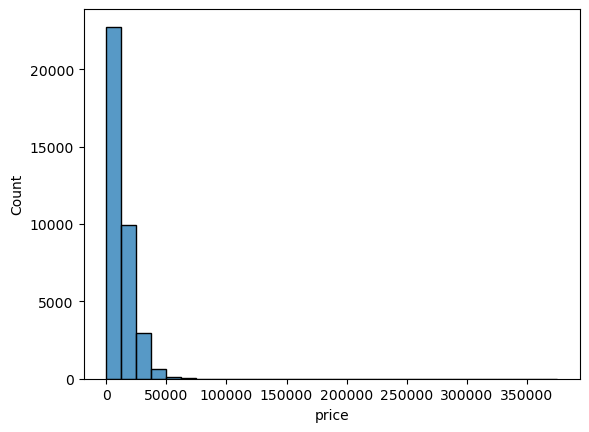

In [ ]:
# price distribution
sns.histplot(data['price'], bins=30)

plt.title('price distribution')
plt.show()

In [ ]:
#correlation between model_year and price
corr1 = data['model_year'].corr(data['price'])
corr1

0.4323693766761758

In [ ]:
# creating a list of numeric features
numeric_features = []
for x in data.columns:
    if data[x].dtype != '0':
        numeric_features.append(x)
    

In [ ]:
data[numeric_features].corr()

,price,model_year,cylinders,odometer,is_4wd,days_listed
price,1.000000,0.432369,0.296464,-0.421902,0.319446,0.001013
model_year,0.432369,1.000000,-0.147531,-0.473883,0.048437,-0.007581
cylinders,0.296464,-0.147531,1.000000,0.089742,0.402108,0.006441
odometer,-0.421902,-0.473883,0.089742,1.000000,0.033832,0.005128
is_4wd,0.319446,0.048437,0.402108,0.033832,1.000000,0.006678
days_listed,0.001013,-0.007581,0.006441,0.005128,0.006678,1.000000


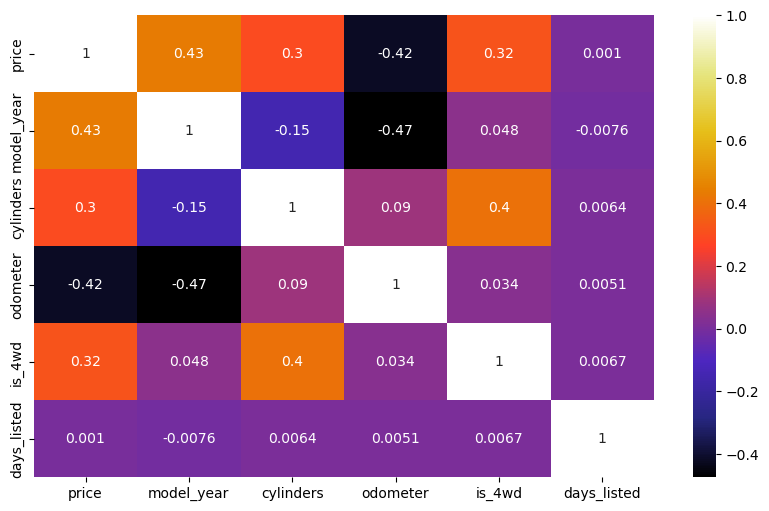

In [ ]:
numeric_features_df = data[numeric_features]
plt.figure(figsize=(10,6))

sns.heatmap(numeric_features_df.corr(), cmap='CMRmap', annot=True)
plt.show()

In [ ]:
four_wd = data.is_4wd.unique()
four_wd

array([1., 0.])

In [ ]:
checkbox_value = 0


data_filtered =  data[(data.is_4wd == checkbox_value)]

data_filtered

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,car_company
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,hyundai
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,chrysler
6,12990,2015,toyota camry,excellent,4,gas,79212.0,automatic,sedan,white,0.0,2018-12-27,73,toyota
11,8990,2012,honda accord,excellent,4,gas,111142.0,automatic,sedan,grey,0.0,2019-03-28,29,honda
13,16500,2018,hyundai sonata,excellent,4,gas,22104.0,automatic,sedan,silver,0.0,2019-01-14,29,hyundai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51518,3750,2005,ford taurus,excellent,6,gas,110200.0,automatic,sedan,silver,0.0,2018-08-10,63,ford
51520,9249,2013,nissan maxima,like new,6,gas,88136.0,automatic,sedan,black,0.0,2018-10-03,37,nissan
51521,2700,2002,honda civic,salvage,4,gas,181500.0,automatic,sedan,white,0.0,2018-11-14,22,honda
51522,3950,2009,hyundai sonata,excellent,4,gas,128000.0,automatic,sedan,blue,0.0,2018-11-15,32,hyundai


In [ ]:
selected_menu = 'bmw'
year = data.loc[data['car_company'] == selected_menu, 'model_year']
min_year, max_year = int(year.min()), int(year.max())


<div style="border:solid purple 3px; padding: 10px">

Observation:
The analysis shows 
- the odometer rating and model_ year are inversely related. 
    - a. Higher the odometer rating, lower the price. 
    - b. Older the vehicle, lower the price .

